# Day 25 Interactive map 
### In this case, with the CDMX metro data, I made an average of the daily influx this year (penultimate row of the popup). 

In [1]:
import pandas as pd
import numpy as np

In [198]:
url = "https://datos.cdmx.gob.mx/dataset/f2046fd5-51b5-4876-b008-bd65d95f9a02/resource/0e8ffe58-28bb-4dde-afcd-e5f5b4de4ccb/download/afluencia_metro.csv"
afluencia = pd.read_csv(url, usecols = [5,6,7], encoding = 'cp1252')
afluencia.replace(',','', regex=True, inplace=True)
afluencia['afluencia'] = pd.to_numeric(afluencia['afluencia'], errors='coerce')
afluencia.linea.replace(' ', '', regex=True, inplace = True)
val_lin = ["Linea1", "Linea2", "Linea3", "Linea4", "Linea5", "Linea6", "Linea7", "Linea8" 
           ,"Linea9", "LineaA", "LineaB", "Linea12"]
nom_lin = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "A", "B", "12"]
dic_lin = dict(zip(val_lin, nom_lin))
afluencia.rename(columns={"linea": "LINEA"}, inplace = True)
afluencia.rename(columns={"estacion": "NOMBRE"}, inplace = True)
afluencia["LINEA"].replace(dic_lin, inplace = True)
afluencia.replace('Ã¡', 'á', regex=True, inplace = True)
afluencia.replace('Ã©', 'é', regex=True, inplace = True)
afluencia.replace('Ã\xad', 'í', regex=True, inplace = True)
afluencia.replace('Ã³', 'ó', regex=True, inplace = True)
afluencia.replace('Ãº', 'ú', regex=True, inplace = True)
afluencia.replace('Ã±', 'ñ', regex=True, inplace = True)

Se remplaza por el nombre de acuerdo al shp

In [199]:
afluencia.replace('20 de noviembre', 'Hospital 20 de Noviembre', regex=True, inplace = True)
afluencia.replace('Azcapotzalco', 'UAM Azcapotzalco', regex=True, inplace = True)
afluencia.replace('Blvd. Puerto Aéreo', 'Boulevard Puerto Aéreo', regex=True, inplace = True)
afluencia.replace('Deptvo. 18 de Marzo', 'Deportivo 18 de Marzo', regex=True, inplace = True)
afluencia.replace('Etiopía', 'Etiopía/Plaza de la Transparencia', regex=True, inplace = True)
afluencia.replace('Ferrería', 'Ferrería/Arena Ciudad de México', regex=True, inplace = True)
afluencia.replace('Garibaldi', 'Garibaldi/Lagunilla', regex=True, inplace = True)
afluencia.replace('Gómez Farías', 'Gomez Farías', regex=True, inplace = True)
afluencia.replace('Inst. del Petróleo', 'Instituto del Petróleo', regex=True, inplace = True)
afluencia.replace('La Villa-Basilica', 'La Villa/Basílica', regex=True, inplace = True)
afluencia.replace('Miguel A. de Q.', 'Miguel Ángel de Quevedo', regex=True, inplace = True)
afluencia.replace('Niños Héroes', 'Niños Héroes/Poder Judicial CDMX', regex=True, inplace = True)
afluencia.replace('Tezozomoc', 'Tezozómoc', regex=True, inplace = True)
afluencia.replace('U A M  I', 'UAM-I', regex=True, inplace = True)
afluencia.replace('Viveros', 'Viveros/Derechos Humanos', regex=True, inplace = True)
afluencia.replace('Zócalo', 'Zócalo/Tenochtitlan', regex=True, inplace = True)

Se agrupan por estación y línea, haciendo un promedio

In [200]:
afluencia = afluencia.groupby(["LINEA","NOMBRE"]).mean().fillna(0).round()

In [201]:
afluencia

afluencia
LINEA NOMBRE                           
01    Balbuena                   5577.0
      Balderas                   8861.0
      Boulevard Puerto Aéreo    13207.0
      Candelaria                15915.0
      Chapultepec               22827.0
...                                 ...
B     Romero Rubio               5092.0
      Río de los Remedios       11321.0
      San Lázaro                 7917.0
      Tepito                    12664.0
      Villa de Aragón            6306.0

[196 rows x 1 columns]

In [104]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

In [202]:
estaciones = gpd.read_file("stcmetro_shp/STC_Metro_estaciones_utm14n.shp")
estaciones = estaciones.merge(afluencia, on=["LINEA","NOMBRE"])

In [203]:
estaciones

,SISTEMA,NOMBRE,LINEA,EST,CVE_EST,CVE_EOD17,TIPO,ALCALDIAS,AÑO,geometry,afluencia
0,STC Metro,Pantitlán,01,01,STC0101,05014,Terminal / Transbordo,Venustiano Carranza,1984,POINT Z (-99.07474 19.41633 0.00000),21298.0
1,STC Metro,Zaragoza,01,02,STC0102,05020,Intermedia,Venustiano Carranza,1969,POINT Z (-99.08229 19.41192 0.00000),21274.0
2,STC Metro,Gomez Farías,01,03,STC0103,05007,Intermedia,Venustiano Carranza,1969,POINT Z (-99.09021 19.41648 0.00000),18797.0
3,STC Metro,Boulevard Puerto Aéreo,01,04,STC0104,05003,Intermedia,Venustiano Carranza,1969,POINT Z (-99.09626 19.41994 0.00000),13207.0
4,STC Metro,Balbuena,01,05,STC0105,05001,Intermedia,Venustiano Carranza,1969,POINT Z (-99.10277 19.42336 0.00000),5577.0
...,...,...,...,...,...,...,...,...,...,...,...
184,STC Metro,Múzquiz,B,17,STCLB17,05185,Intermedia,Estado de México - Ecatepec,2000,POINT Z (-99.04207 19.50149 0.00000),17480.0
185,STC Metro,Ecatepec,B,18,STCLB18,05179,Intermedia,Estado de México - Ecatepec,2000,POINT Z (-99.03607 19.51513 0.00000),11486.0
186,STC Metro,Olímpica,B,19,STCLB19,05188,Intermedia,Estado de México - Ecatepec,2000,POINT Z (-99.03334 19.52134 0.00000),9824.0
187,STC Metro,Plaza Aragón,B,20,STCLB20,05189,Intermedia,Estado de México - Ecatepec,2000,POINT Z (-99.03018 19.52848 0.00000),10855.0


Text(0.5, 1.0, 'Volcanoes')

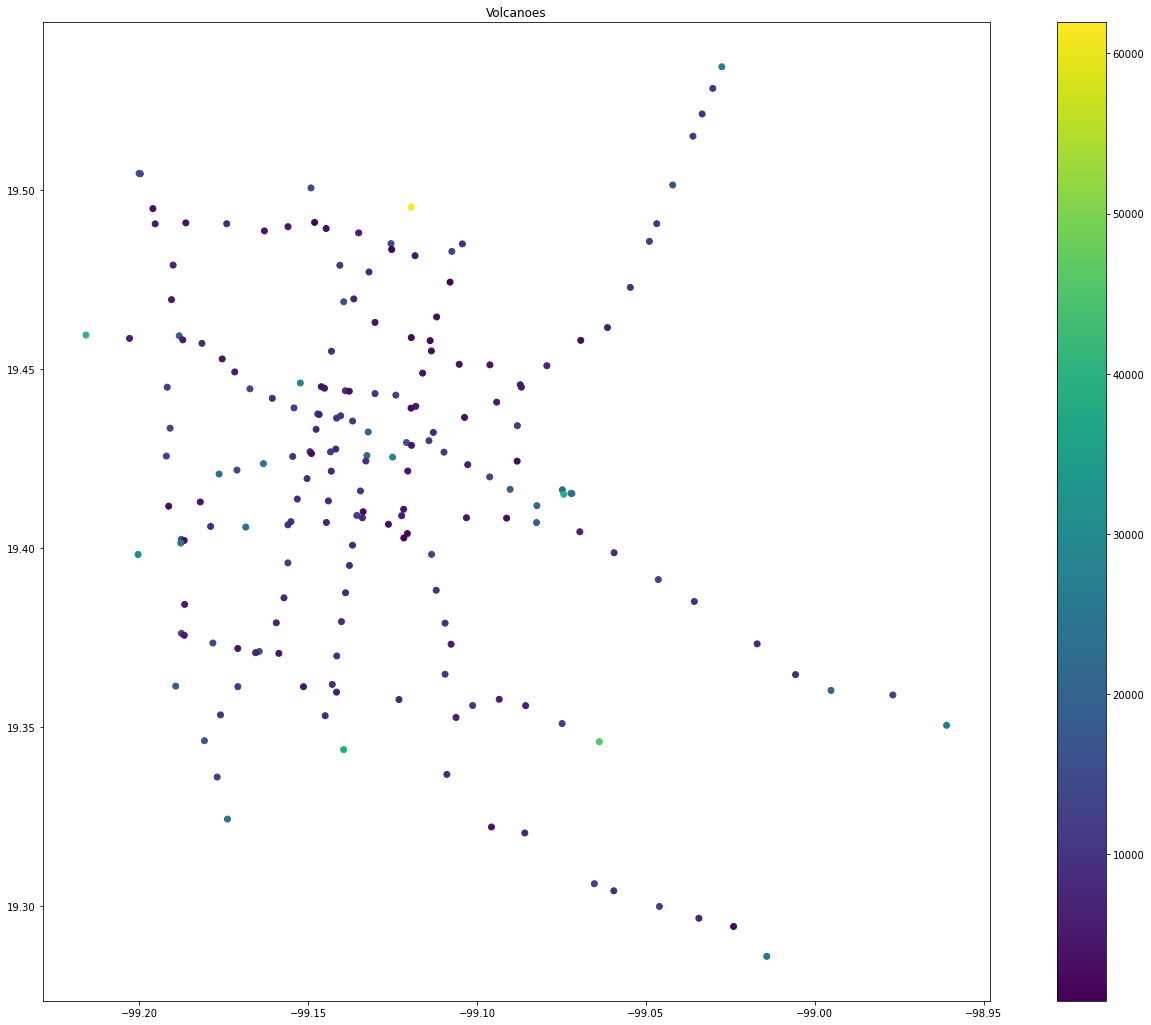

In [204]:
fig, ax = plt.subplots(figsize=(24,18))
estaciones.plot(column='afluencia', ax=ax, legend=True)
plt.title('Volcanoes')

In [206]:
map = folium.Map(location = [19.45,-99.10], tiles='cartodbpositron', zoom_start = 11,
                min_zoom = 11, control_scale = True, zoom_control = True)

# Create a geometry list from the GeoDataFrame
estaciones_list = [[point.xy[1][0], point.xy[0][0]] for point in estaciones.geometry ]

# Iterate through list and add a marker for each volcano, color-coded by its type.
i = 0
for coordinates in estaciones_list:
    #assign a color marker for the type of volcano, Strato being the most common
    if estaciones.LINEA[i] == "01":
        type_color = "pink"
        #type_color = "#ed699b"
    elif estaciones.LINEA[i] == "02":
        type_color = "blue"
        #type_color = "#007bc1"
    elif estaciones.LINEA[i] == "03":
        type_color = "darkgreen"
        #type_color = "#bfac1c"
    elif estaciones.LINEA[i] == "04":
        type_color = "cadetblue"
        #type_color = "#7bc7ba"
    elif estaciones.LINEA[i] == "05":
        #type_color = "#7bc7ba"
        type_color = "black"
    elif estaciones.LINEA[i] == "06":
        #type_color = "#e82428"
        type_color = "red"
    elif estaciones.LINEA[i] == "07":
        type_color = "orange"
        #type_color = "#f07b2d"
    elif estaciones.LINEA[i] == "08":
        type_color = "green"
        #type_color = "#02a263"
    elif estaciones.LINEA[i] == "09":
        type_color = "darkred"
        #type_color = "#571c00"
    elif estaciones.LINEA[i] == "A":
        type_color = "purple"
        #type_color = "#922d91"
    elif estaciones.LINEA[i] == "B":
        type_color = "lightgray"
        #type_color = "#4d9e7f"
    elif estaciones.LINEA[i] == "12":
        type_color = "beige"
        #type_color = "#b69c51"
    else:
        type_color = "black"
        
    # Place the markers with the popup labels and data
    map.add_child(folium.Marker(location = coordinates,
                            popup =
                            "Año de inaguración: " + str(estaciones.AÑO[i]) + '<br>' +
                            "Nombre de la estación: " + '<br>' + 
                                '<u>'+'<big>' + str(estaciones.NOMBRE[i]) + '</big>'+ '</u>' + '<br>'+ 
                            "Línea: " + str(estaciones.LINEA[i]) + '<br>' +
                            "Alcaldía: " + str(estaciones.ALCALDIAS[i]) + '<br>'
                            "Tipo: " + str(estaciones.TIPO[i]) + '<br>'
                            "Promedio de usuarios por día: " + '<b>'+ str(estaciones.afluencia[i]) + '</b>'+'<br>'
                            '<small>' + "Coordinates: " + str(estaciones_list[i])+ '</small>',
                            icon = folium.Icon(icon="subway", prefix='fa', color = "%s" % type_color)))
    i = i + 1
map

In [207]:
map.save(outfile='map.html')